In [1]:
#Passkey puller
#I did have to modify the file location based on the computer on using: ie laptop vs desktop
import json

with open('C:\\Users\\aaron_k2cr2v\OneDrive\Documents\GitHub\secrets_20230508.json') as f:
    data = json.load(f)
    secret_key = str(data['mongodb'])

#print(f"My key is "+len(secret_key)+" long.")



In [2]:
#All borrowed from Profs guides

import pymongo
import certifi

# Once you have retrieved your connection string from a secrets file, use it here
mongo_connection_string = data['mongodb']

# Connect to the database using known good certificates
client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

# Fetch the database named "DA320"
da320_database = client['DA320']

# Within the database we have "collections". Think of them as tables in SQL.
allCollections = da320_database.list_collection_names()

# Here is the list of collections within my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 6.0.6.
This database has the collections ['imdb', 'metacritic', 'View_imdb_2015', 'View_metacritic_2015', 'View_Practical_DB']


In [3]:
import pandas as pd

# Retrieve all records from a collection - this can be a large amount of data!
cursor = da320_database.View_Practical_DB.find()

# Convert this information into a Pandas dataframe
imdb_view = pd.DataFrame(cursor)

# Make sure we've read the information correctly
#imdb_view.head()

Construct three charts.  These charts may be histograms, line charts, or XY plots.  

Using some of the numeric fields (runtime, user rating, votes, budget, opening weekend, gross sales), create one chart each using the following rules.  The following are IDEAS for the rules you could use.  

Any three different charts are acceptable:
One chart that graphs a single genre of movies over time.
One chart that graphs movies released within a single year.
One chart that tracks the career of your favorite actor, director, producer, or a company you like.

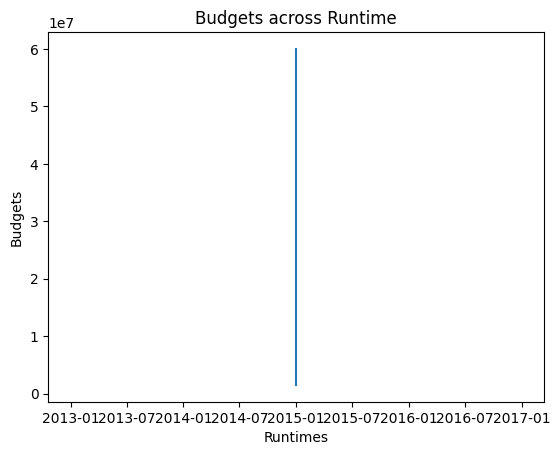

In [6]:
from matplotlib import pyplot
import numpy as np

#Query break down
sub_q = imdb_view.query("release_date == '2015'")
sub_q_s= sub_q.sort_values(by='release_date', ascending=True)



# Plot runtimes in a distribution histogram
pyplot.title('Budgets across Runtime')
pyplot.xlabel('Runtimes')
pyplot.ylabel('Budgets')

pyplot.plot(sub_q_s['release_date'], sub_q_s['budget'])

pyplot.show()

Hmmm. Seems like it doesn't read the full release date data. Just the year.

<bound method PlotAccessor.box of <pandas.plotting._core.PlotAccessor object at 0x00000243075D9CD0>>